# Generative Adversarial Network
The goal is to generate handwritten digits !

## Imports

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import gridspec
import numpy as np

from IPython.display import clear_output

## Import dataset

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Method for displaying images

In [3]:
def display_images(samples):
    fig = plt.figure(figsize=(10,10))
    gs = gridspec.GridSpec(10,10)
    
    for i, img in enumerate(samples):
        plt.subplot(gs[i])
        plt.axis('off')
        plt.imshow(img.reshape(28, 28), cmap='Greys')
    
    return fig


## Test : displaying images

In [4]:
images = mnist.train.images[0:100]

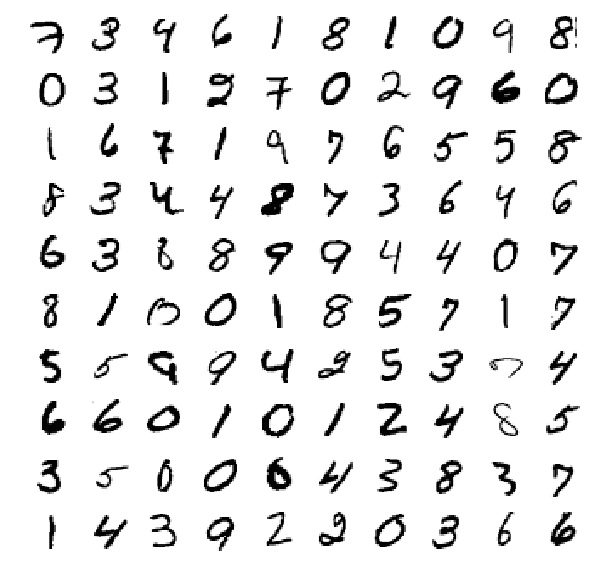

In [5]:
display_images(images)

## GAN Model

In [6]:
X = tf.placeholder(tf.float32, [None, 784])
Z = tf.placeholder(tf.float32, [None, 64])

# Discriminator
D_W1 = tf.Variable(tf.truncated_normal([784, 100], stddev=0.1))
D_B1 = tf.Variable(tf.zeros([100]))

D_W2 = tf.Variable(tf.truncated_normal([100, 1], stddev=0.1))
D_B2 = tf.Variable(tf.zeros([1]))

# Generator
G_W1 = tf.Variable(tf.truncated_normal([64, 100], stddev=0.1))
G_B1 = tf.Variable(tf.zeros([100]))

G_W2 = tf.Variable(tf.truncated_normal([100, 784], stddev=0.1))
G_B2 = tf.Variable(tf.zeros([784]))

In [7]:
theta_D = [D_W1, D_W2, D_B1, D_B2]
theta_G = [G_W1, G_W2, G_B1, G_B2]

In [8]:
def discriminator(X):
    D_h1 = tf.nn.relu(tf.add(tf.matmul(X, D_W1), D_B1))
    D_logits = tf.add(tf.matmul(D_h1, D_W2), D_B2)
    
    return  tf.nn.sigmoid(D_logits)

In [9]:
def generator(Z):
    G_h1 = tf.nn.relu(tf.add(tf.matmul(Z, G_W1), G_B1))
    G_logits = tf.add(tf.matmul(G_h1, G_W2), G_B2)
    
    return tf.nn.sigmoid(G_logits)

### The magic'

In [10]:
G_sample = generator(Z)
D_real_prob = discriminator(X)
D_fake_prob = discriminator(G_sample)

In [11]:
def log(x):
    return tf.log(x + 1e-6)

Why I need to do that ??

### Loss

In [12]:
D_loss = - tf.reduce_mean(log(D_real_prob) + log(1. - D_fake_prob))
G_loss = - tf.reduce_mean(log(D_fake_prob))

### Model

In [13]:
D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

### Start the model

In [14]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

### Generate noise

In [15]:
def generate_noise(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

### Training

In [ ]:
i = 0

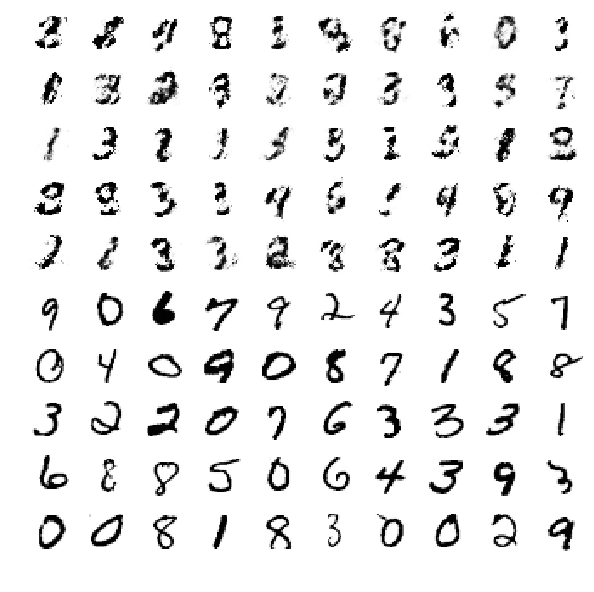

In [ ]:
for it in range(100000):
    batch_xs, _ = mnist.train.next_batch(100)
    Z_gen = generate_noise(100, 64)
    
    sess.run([D_solver], feed_dict={X: batch_xs, Z: Z_gen})
    sess.run([G_solver], feed_dict={Z: Z_gen})
    
    if it % 1000 == 0:
        samples = sess.run(G_sample, feed_dict={Z: Z_gen})
        output = np.concatenate((samples[0:50], batch_xs[0:50]), axis=0)
        fig = display_images(output)
        clear_output()
        plt.xlabel('toto')        
        plt.show()
        plt.savefig('output/{}'.format(str(i).zfill(3)), bbox_iniches='tight')
        plt.close(fig)
        i += 1